# Input data

Text(0, 0.5, 'Second feature')

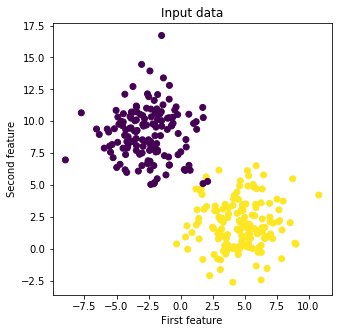

In [14]:
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
import numpy as np

X,y = make_blobs(n_samples = 300, random_state = 42, centers = 2, cluster_std = 2)

plt.figure(figsize=(5,5))
plt.title("Input data")
plt.scatter(X[:,0], X[:,1], c = y)
plt.xlabel("First feature")
plt.ylabel("Second feature")

# Train and test separation

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

print("Shape of train data: {}".format(X_train.shape))
print("Shape of test data: {}".format(X_test.shape))

Shape of train data: (225, 2)
Shape of test data: (75, 2)


# Neural network using Keras

In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense
from keras.models import Sequential

model = Sequential()
model.add(Dense(units=3, input_dim=2, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid')) 
model.compile(optimizer='sgd', loss='mse', metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 3)                 9         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 4         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


# Neural network training

In [17]:
history = model.fit(X_train, y_train,
                    batch_size=30,
                    epochs=150,
                    validation_data=(X_test, y_test))

Train on 225 samples, validate on 75 samples
Epoch 1/150
225/225 [==============================] - 0s 281us/step - loss: 0.3485 - accuracy: 0.4978 - val_loss: 0.3481 - val_accuracy: 0.4800
Epoch 2/150
225/225 [==============================] - 0s 62us/step - loss: 0.3460 - accuracy: 0.4889 - val_loss: 0.3459 - val_accuracy: 0.4533
Epoch 3/150
225/225 [==============================] - 0s 85us/step - loss: 0.3437 - accuracy: 0.4889 - val_loss: 0.3436 - val_accuracy: 0.4533
Epoch 4/150
225/225 [==============================] - 0s 85us/step - loss: 0.3413 - accuracy: 0.4844 - val_loss: 0.3413 - val_accuracy: 0.4533
Epoch 5/150
225/225 [==============================] - 0s 67us/step - loss: 0.3390 - accuracy: 0.4844 - val_loss: 0.3389 - val_accuracy: 0.4400
Epoch 6/150
225/225 [==============================] - 0s 65us/step - loss: 0.3366 - accuracy: 0.4844 - val_loss: 0.3366 - val_accuracy: 0.4000
Epoch 7/150
225/225 [==============================] - 0s 53us/step - loss: 0.3343 - accur

# Accuracy and loss

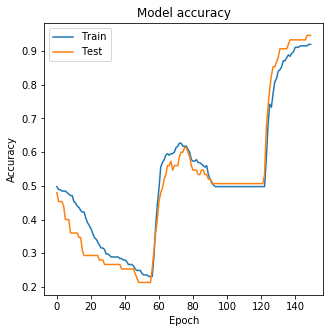

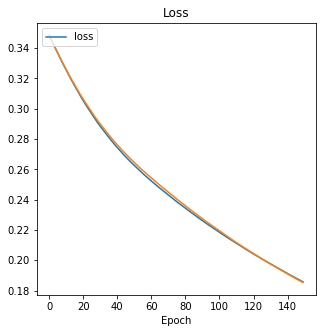

In [18]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(5,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.figure(figsize=(5,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.xlabel('Epoch')
plt.legend(['loss'], loc='upper left')

# Results

0.9466666666666667


ValueError: 'c' argument has 75 elements, which is not acceptable for use with 'x' with size 75, 'y' with size 75.

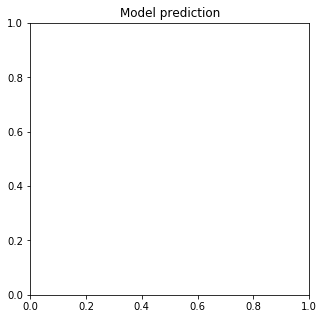

In [20]:
y_pred = model.predict(X_test)
y_classes = y_pred >= 0.5
acc = (y_classes == y_test.reshape(len(y_pred),1)).mean()
print(acc)

plt.figure(figsize=(5,5))
plt.title("Model prediction")
plt.scatter(X_test[:,0], X_test[:,1], c = y_classes)
plt.xlabel("First feature")
plt.ylabel("Second feature")

plt.figure(figsize=(5,5))
plt.title("Test data")
plt.scatter(X_test[:,0], X_test[:,1], c = y_test)
plt.xlabel("First feature")
plt.ylabel("Second feature")